In [81]:
from snakemake.io import expand
import pandas as pd
import yaml
import pdb
import re
import numpy as np
import pyranges as pr
import cerberus
import seaborn as sns
from utils import *

In [82]:
config_file = 'config.yml'
with open(config_file) as f:
    config = yaml.safe_load(f)

In [87]:
h5 = expand(config['data']['cerb']['ca_trip'], zip, species='human')[0]
ab = expand(config['data']['cerb']['agg_ab'], zip, species='human')[0]
meta = expand(config['data']['meta'], zip, species='human')[0]

In [99]:
ca = cerberus.read(h5)

In [100]:
# temp = ca.triplets.loc[ca.triplets.source=='iPSC_Embryo_pacBioSII_post-capture_human_all']
# len(temp.index)

In [101]:
# df = pd.read_csv(ab, sep='\t')
# df.fillna(0, inplace=True)
# df['gene_id'] = df.annot_transcript_id.str.split('[', expand=True)[0]
# df.drop(['annot_transcript_id', 'annot_transcript_name'], axis=1, inplace=True)
# print(len(df.index))

In [102]:
# source = 'iPSC_Embryo_pacBioSII_post-capture_human_all'
# temp = df[[source]]
# df = df.sort_values(by=source,ascending=True)
# df = df.loc[df[source]>0]
# df['x_ind'] = [i for i in range(len(df.index))]
# sns.scatterplot(data=df, x='x_ind', y=source)
# len(temp.loc[temp[source]>=1])
# # temp

480019
32909
0


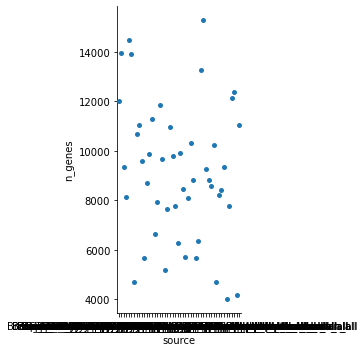

In [103]:
# add gene TPMs
df = pd.read_csv(ab, sep='\t')
df.fillna(0, inplace=True)
df['gene_id'] = df.annot_transcript_id.str.split('[', expand=True)[0]
df.drop(['annot_transcript_id', 'annot_transcript_name'], axis=1, inplace=True)
print(len(df.index))

# sum up 
df = df.groupby('gene_id').sum()
print(len(df.index))
df = df.melt(ignore_index=False, var_name='source', value_name='gene_tpm').reset_index()

temp = ca.triplets[['source', 'gene_id']]
temp = temp.groupby('source').count().reset_index().rename({'gene_id':'n_genes'}, axis=1)
sns.catplot(temp, x='source', y='n_genes')

ca.triplets = ca.triplets.merge(df, how='left', on=['gene_id', 'source'])
print(len(ca.triplets.loc[ca.triplets.gene_tpm.isnull()]))

ca.write('ca_trip_tpm.h5')

In [104]:
len(ca.triplets.source.unique())

48

In [105]:
# add in the metadata
config_fname = '230614_config.tsv'
df = parse_input_config(config, config_fname, 'all')
df = df.loc[df.species == 'human']
df.rename({'dataset':'source'}, axis=1, inplace=True)

In [106]:
len(df.index)

48

In [107]:
ca.triplets.head()

,source,gene_id,n_iso,n_tss,n_ic,n_tes,splicing_ratio,tss_ratio,tes_ratio,spl_ratio,sector,gene_tpm
0,Brain_Adult_ont_post-capture_human_all,ENSG00000000419,2.0,1.0,2.0,1.0,2.000000,0.250000,0.250000,0.500000,mixed,29.775390
1,Brain_Adult_ont_post-capture_human_all,ENSG00000001084,1.0,1.0,1.0,1.0,1.000000,0.333333,0.333333,0.333333,simple,24.812825
2,Brain_Adult_ont_post-capture_human_all,ENSG00000001630,7.0,2.0,7.0,6.0,1.750000,0.205128,0.615385,0.179487,tes,143.914385
3,Brain_Adult_ont_post-capture_human_all,ENSG00000002330,4.0,2.0,4.0,2.0,2.000000,0.333333,0.333333,0.333333,mixed,223.315425
4,Brain_Adult_ont_post-capture_human_all,ENSG00000002586,4.0,2.0,4.0,1.0,2.666667,0.352941,0.176471,0.470588,mixed,133.989255


In [108]:
print(len(ca.triplets.index))
ca.triplets = ca.triplets.merge(df, how='left', on='source')
print(len(ca.triplets.index))

438040
438040


In [110]:
temp = ca.triplets[['source', 'gene_id']]
temp = temp.groupby('source').count().reset_index().rename({'gene_id':'n_genes'}, axis=1)

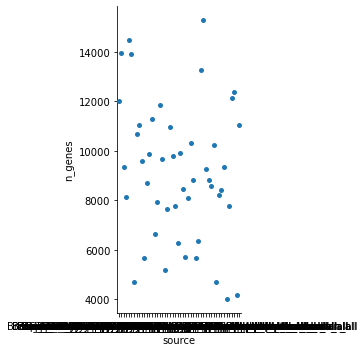

In [111]:
import seaborn as sns
sns.catplot(temp, x='source', y='n_genes')

In [114]:
ca.write('ca_trip_tpm_meta.h5')

## Perform the comparisons we want to make

In [115]:
ca = cerberus.read('ca_trip_tpm_meta.h5')

In [118]:
# compare isoform diversity pre- and post- capture for matching samples?
df = ca.triplets.copy(deep=True)
cols =  ['tissue', 'age', 'platform', 'capture']
df[gb_cols].head()
df = df.groupby

,tissue,age,platform,capture
0,Brain,Adult,ont,post-capture
1,Brain,Adult,ont,post-capture
2,Brain,Adult,ont,post-capture
3,Brain,Adult,ont,post-capture
4,Brain,Adult,ont,post-capture


In [ ]:
ca = cerberus.read(cerberus_h5)
ca = get_centroids(ca, 
                   source='sample_det',
                   gene_subset=gene_subset,
                   ver=ver)
df = compute_dists([ca, ca],
                   ['sample_det_centroid', 'obs_det'],
                   rm_1_isos=[False, True],
                   gene_subsets=[gene_subset, gene_subset],
                   ver=[ver, ver])